# Задача 2: Economics of Cities

### Let's Import all necessary libraries

In [339]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

import os

In [340]:
os.chdir("C:/Users/bahra/Desktop/Lect_01/AD на Python/Задачи для лабораторной 1-3/задача_2_Economics of Cities")

## Standardization Data and Data Cleaning
#### I will solve many problems of the file in on line of code

* I will make the city column index of the dataframe, so we only get numbers to work with
* The data is concatenated by ';' I will seperate them.
* The numbers are object type, because of the ',' so will choose decimal variable to do the trick

In [341]:
df = pd.read_csv('Econom_Cities_data.csv', sep=";", decimal=',' , header = 0, index_col='City')

In [342]:
df.head(8)

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9


In [343]:
print(df.shape)

(48, 3)


In [344]:
df.dtypes

Work        int64
Price     float64
Salary    float64
dtype: object

#### Some of the main problems are solved in the data as you see above

#### Now let's see what we have inside

In [345]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

#### As we can see there are outliers in the file
* There are negative values in the data, so will fix it later\'

In [346]:
# Let's see if what types of data we got so far
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, Amsterdam to Zurich
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Work    48 non-null     int64  
 1   Price   48 non-null     float64
 2   Salary  48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5+ KB


In [347]:
# Let's see the basic describtion of our data
df.describe(include=[np.number])

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1384.958333,68.860417,-378.727083
std,2404.897007,21.784659,2027.338052
min,-9999.000000,30.300000,-9999.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


In [348]:
# As you see can, that outliers is making our data look ugly
# Let's locate them
df[df['Work'] < 0]

,Work,Price,Salary
City,,,
Cairo,-9999,37.1,-9999.0
Jakarta,-9999,43.6,-9999.0


#### These outliers can be deleted or we can change the values 
* for now I will change the values

In [349]:
# df = df.drop(df[df.Work < 0].index)

In [350]:
df = df.replace({'Work': -9999, 'Salary': -9999.0}, 0).astype(float)

### Let's do some preprocessing for data cleaning

In [351]:
from sklearn import preprocessing

In [352]:
stand_1 = preprocessing.MinMaxScaler()

stand_1.fit(df)

X = stand_1.transform(df)

X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [353]:
X

,Work,Price,Salary
City,,,
Amsterdam,0.721684,0.414319,0.490
Athens,0.754526,0.275822,0.304
Bogota,0.906105,0.089202,0.115
Bombay,0.864000,0.000000,0.053
Brussels,0.719158,0.510563,0.505
Buenos_Aires,0.829895,0.302817,0.125
Cairo,0.000000,0.079812,0.000
Caracas,0.859368,0.360329,0.109
Chicago,0.810105,0.511737,0.619


#### Now it looks good
* As you can see in the describtion

In [354]:
X.describe(include='all')

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,0.758561,0.452587,0.378979
std,0.175242,0.255688,0.255076
min,0.000000,0.000000,0.000000
25%,0.732947,0.227113,0.122500
50%,0.772421,0.471831,0.403000
75%,0.830632,0.603286,0.587000
max,1.000000,1.000000,1.000000


## Scatter Plot for visual view

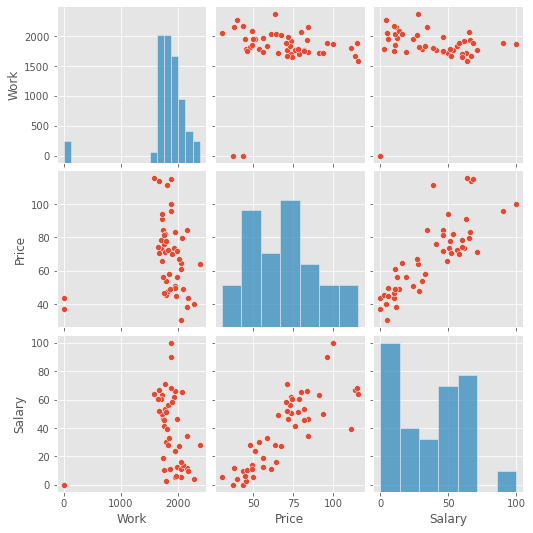

In [355]:
# Let's do cross comparison between our column with pairplot using seaborn library
sns.pairplot(df[['Work', 'Price', 'Salary']])

## Initial Data
#### What can we got?
* We can get Histograms out of same columns
* We can get scatter-plots out of two different columns

#### What can we interprete?
* As you can see, Salary x Work is like constant till x axis 2000, after that we can see that salary goes up after hourly work goes forward
* If we choose Salary with Price, we can see that when Work goes forward Salary also goes high

# Let's do Hierarchical Analysis

In [356]:
# Library for dendrogram and other libraries
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

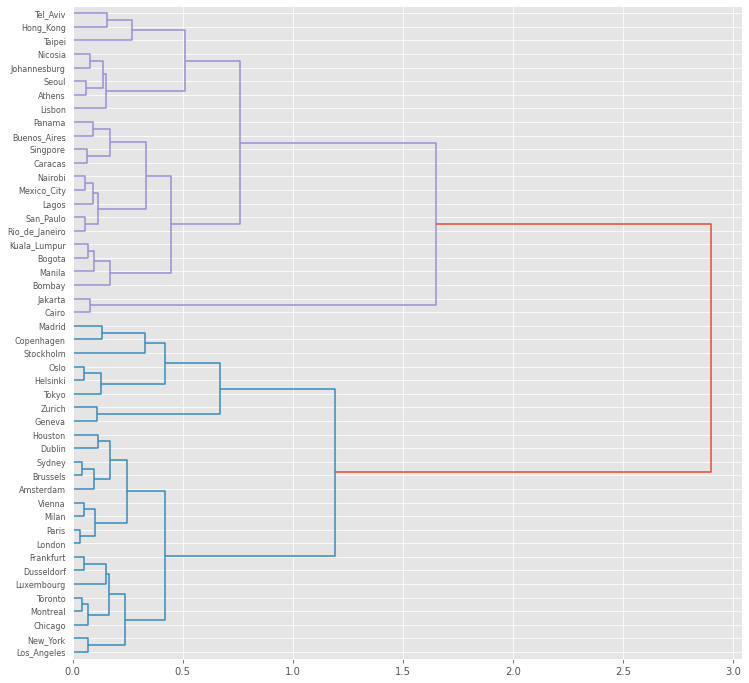

In [357]:
link = linkage(X, 'ward', 'euclidean')

fig = plt.figure(figsize=(12,12))
dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels=X.index.tolist(),
                # повернуть подписи вертикально
                #color_threshold=1.1,
                orientation = "right",
                leaf_rotation=0.)

## Plot the "Scree" plot to determine the best number of clusters

Text(0, 0.5, 'Distance')

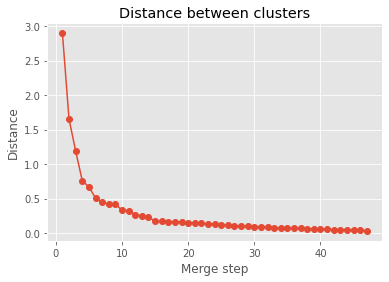

In [358]:
dist = link[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between clusters')
plt.xlabel('Merge step')
plt.ylabel('Distance')

### let's add levels at which we stop the union

Text(22, 0.95, '4 Cluster')

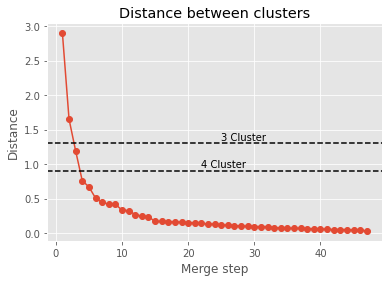

In [359]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between clusters')
plt.xlabel('Merge step')
plt.ylabel('Distance')
plt.axhline(1.3, c='k', linestyle='dashed')
plt.axhline(0.9, c='k', linestyle='dashed')
plt.text(25, 1.35, '3 Cluster')
plt.text(22, 0.95, '4 Cluster')

# Observations
* It can be seen from the picture that if we stop cluster merging at a distance of approximately 0.9, we will get 4 clusters, and at 1.3 we will get 3 clusters.

* Based on the total, we select 0.9 -- 4 clusters, because further, the distance between the clusters ceases to change significantly.

In [360]:
df['cluster'] = fcluster(link, 0.9, criterion='distance')

In [361]:
df["standard_of_living_coef"] = df["Salary"] / df["Price"]

In [546]:
df.groupby('cluster').size()

KeyError: 'cluster'

* Look at the 3rd cluster that consists of two objects

,Work,Price,Salary,cluster,standard_of_living_coef
City,,,,,
Cairo,0.0,37.1,0.0,3,0.0
Jakarta,0.0,43.6,0.0,3,0.0


* as expected, the cities of Cairo and Jakarta fell into a separate cluster

* Let's calculate the average values ​​of features for all clusters

In [364]:
df.groupby('cluster').mean()

,Work,Price,Salary,standard_of_living_coef
cluster,,,,
1,1801.235294,75.758824,55.005882,0.729432
2,1763.750000,104.550000,67.587500,0.655610
3,0.000000,40.350000,0.000000,0.000000
4,1987.857143,52.395238,16.347619,0.298186


In [365]:
# Let's see which countries are in the first cluster
df[df.cluster == 1].index.values

array(['Amsterdam', 'Brussels', 'Chicago', 'Dublin', 'Dusseldorf',
       'Frankfurt', 'Houston', 'London', 'Los_Angeles', 'Luxembourg',
       'Milan', 'Montreal', 'New_York', 'Paris', 'Sydney', 'Toronto',
       'Vienna'], dtype=object)

In [366]:
# Let's see which countries are in the second cluster
df[df.cluster == 2].index.values

array(['Copenhagen', 'Geneva', 'Helsinki', 'Madrid', 'Oslo', 'Stockholm',
       'Tokyo', 'Zurich'], dtype=object)

In [367]:
# Let's see which countries are in the third cluster
df[df.cluster == 3].index.values

array(['Cairo', 'Jakarta'], dtype=object)

In [368]:
# Let's see which countries are in the forth cluster
df[df.cluster == 4].index.values

array(['Athens', 'Bogota', 'Bombay', 'Buenos_Aires', 'Caracas',
       'Hong_Kong', 'Johannesburg', 'Kuala_Lumpur', 'Lagos', 'Lisbon',
       'Manila', 'Mexico_City', 'Nairobi', 'Nicosia', 'Panama',
       'Rio_de_Janeiro', 'San_Paulo', 'Seoul', 'Singpore', 'Taipei',
       'Tel_Aviv'], dtype=object)

# Let's do Factor Analysis

#### First we need to read our data again
    * Because, we did clustering

### Data Cleaning

In [523]:
df2 = pd.read_csv('Econom_Cities_data.csv', sep=";", decimal=',' , header = 0, index_col='City')
df2 = df2.replace({'Work': -9999, 'Salary': -9999.0}, 0).astype(float)
df2.head()

,Work,Price,Salary
City,,,
Amsterdam,1714.0,65.6,49.0
Athens,1792.0,53.8,30.4
Bogota,2152.0,37.9,11.5
Bombay,2052.0,30.3,5.3
Brussels,1708.0,73.8,50.5


In [524]:
df2.describe()

,Work,Price,Salary
count,48.000000,48.000000,48.000000
mean,1801.583333,68.860417,37.897917
std,416.199361,21.784659,25.507558
min,0.000000,30.300000,0.000000
25%,1740.750000,49.650000,12.250000
50%,1834.500000,70.500000,40.300000
75%,1972.750000,81.700000,58.700000
max,2375.000000,115.500000,100.000000


In [525]:
df2.corr()

,Work,Price,Salary
Work,1.000000,0.073488,0.107600
Price,0.073488,1.000000,0.819774
Salary,0.107600,0.819774,1.000000


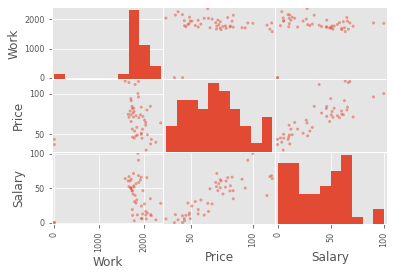

In [526]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2);

* We see that these features are far from normal, there is no correlation between features.

#### We standardize the variables. From the preliminary analysis it is clear that this is important.

In [527]:
import math
from sklearn import preprocessing
#  from sklearn.decomposition import PCA


# Функция для стандартизации фич
def scale_features(df2):
    scaled = preprocessing.StandardScaler().fit_transform(df2)
    scaled = pd.DataFrame(scaled, columns=df2.columns)
    return scaled

In [528]:
df_scaled = preprocessing.scale(df2)

* Let's try using the method of principal components to project data onto a two-dimensional plane. That is, we distinguish two main components. The implementation of the method is contained in the PCA library class sklearn.decomposition.

In [529]:
from sklearn.decomposition import PCA

In [530]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

[0.61310587 0.32705811 0.05983602]


* The coordinates of the components themselves are in the components_.

In [531]:
print (pca.components_)

[[ 0.15087846  0.69745927  0.70056139]
 [-0.98810466  0.12772698  0.08564466]
 [ 0.02974693  0.7051499  -0.708434  ]]


In [532]:
print ('Explained variance by component: %s' % pca.explained_variance_ratio_)

Explained variance by component: [0.61310587 0.32705811 0.05983602]


In [533]:
pca.singular_values_

array([9.39612927, 6.86267938, 2.9353682 ])

In [534]:
pca.explained_variance_ratio_

array([0.61310587, 0.32705811, 0.05983602])

In [535]:
data = pca.transform(df_scaled)
data

array([[ 1.70567197e-01,  2.28485604e-01, -4.24586282e-01],
       [-6.98897211e-01, -9.16849618e-02, -2.82896148e-01],
       [-1.60603225e+00, -1.11375178e+00, -2.46534918e-01],
       [-2.06064852e+00, -9.39897144e-01, -3.28348437e-01],
       [ 4.75312336e-01,  2.96557456e-01, -1.98885279e-01],
       [-1.05572752e+00, -5.68257875e-01,  3.07676126e-01],
       [-2.73949199e+00,  4.00564576e+00, -1.05366208e-01],
       [-9.15952837e-01, -7.12600018e-01,  5.17927062e-01],
       [ 8.74092326e-01, -1.82403391e-01, -4.99980995e-01],
       [ 1.38898802e+00,  4.20730517e-01,  2.61827770e-02],
       [ 3.12601958e-01,  1.56354135e-01,  1.32177373e-01],
       [ 8.91113312e-01,  3.93308052e-01, -3.18477780e-01],
       [ 7.51491800e-01,  4.73453061e-01, -4.58043688e-01],
       [ 2.35803630e+00,  1.49883094e-01, -5.80617102e-01],
       [ 2.19487958e+00,  6.85379173e-01,  6.48191594e-01],
       [-2.33930012e-01, -1.44001049e+00,  1.59305116e-01],
       [ 3.96179787e-01, -3.76745773e-01

* Let's try using factor analysis to build new features that would be more convenient to use with minimal loss of information.
* We use the class FactorAnalysisfrom sklearn.decomposition. Let's start with two factors.

In [536]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

FactorAnalysis(n_components=2)

In [537]:
pd.DataFrame(fa.components_, columns=df2.columns)

,Work,Price,Salary
0,0.101013,0.904711,0.907019
1,-0.278079,0.053454,-0.046344


* We see that the first (zero) factor strongly correlates with high salary and price features (cities with more salary increases the price for 12 good), so it can be interpreted as more salary, high price. 

* The second factor, on the contrary, correlates with the features associated with the high price for low work and salary. That is, we have reduced the space of seven features to two new interpretable features.

* The uniqueness of features in the sense of the variance explained by the factors (the more, the worse it is explained by the factors) is contained in the attribute noise_variance_.

In [538]:
print('Uniqueness:')
pd.Series(fa.noise_variance_, df2.columns)

Uniqueness:


Work      0.918115
Price     0.180273
Salary    0.176862
dtype: float64

    * Finally, the factors themselves (as new feature vectors) can be obtained by applying the transform

In [542]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2'])
scores.head()

,factor1,factor2
0,0.144397,-0.086038
1,-0.493208,-0.109938
2,-1.222956,-0.368210
3,-1.522454,-0.338210
4,0.361216,0.005342


In [543]:
scores

,factor1,factor2
0,0.144397,-0.086038
1,-0.493208,-0.109938
2,-1.222956,-0.368210
3,-1.522454,-0.338210
4,0.361216,0.005342
5,-0.792499,-0.032773
6,-1.526566,1.152199
7,-0.710721,-0.003524
8,0.596171,-0.242654
9,1.007694,0.100081


### Now let's try to build not two, but three factors. What will change?

In [545]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)
pd.DataFrame(fa.components_, columns=df2.columns)

,Work,Price,Salary
0,0.115880,0.783186,0.785158
1,-0.083969,0.005816,0.001664
2,0.000000,0.000000,-0.000000


* The zero factor changed, it means if you work more you will get more salary and also the price also change accordingly
* The first facator also changed, it means price and salary have inter-related, like our first analysis in the above (with 2 factor)
* The 3 third factor, will it cannot be interpreted becuase it is related to those 2 cities